In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# dataset downloaded in .zip so extract
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
# import dependencies

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  # for all cnn 
from google.colab.patches import cv2_imshow  # creates another window and shoe image
from PIL import Image # for image preprocessing
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [11]:
print('No. of mask images:', len(with_mask_files))
print('No. of without mask images:', len(without_mask_files))

No. of mask images: 3725
No. of without mask images: 3828


In [12]:
# creating labels for the two classes of images
# with mask = 1
# without mask = 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
labels = with_mask_labels + without_mask_labels
len(labels)

7553

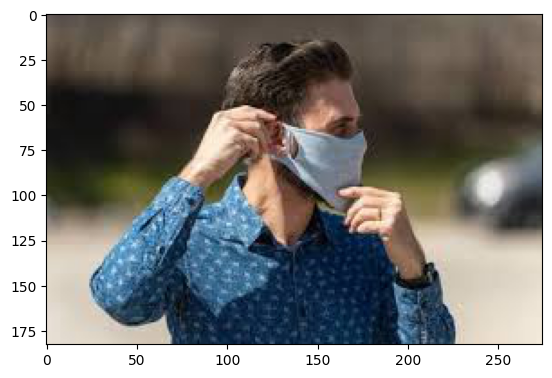

In [16]:
# displaying images

#with mask
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

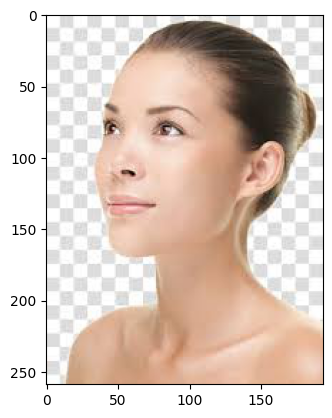

In [17]:
#without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
# image processing
# resize the images
# convert the images to numpy arrays

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)  

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(labels)

list

In [26]:
type(data)

list

In [30]:
# converting image list and label list to numpy array
X = np.array(data)
y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
type(y)

numpy.ndarray

In [33]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [49]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [50]:
# building CNN
import tensorflow as tf
from tensorflow import keras

In [51]:
num_of_classes = 2  # with and without

model = keras.Sequential()
    
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))  # to reduce overfitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [52]:
# compile the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
# training the network
history = model.fit(X_train_scaled,y_train,validation_split = 0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 6s 19ms/step - loss: 0.5110 - accuracy: 0.7697 - val_loss: 0.3212 - val_accuracy: 0.8727
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.3093 - accuracy: 0.8782 - val_loss: 0.2175 - val_accuracy: 0.9008
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2472 - accuracy: 0.9045 - val_loss: 0.2224 - val_accuracy: 0.9207
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2033 - accuracy: 0.9194 - val_loss: 0.2179 - val_accuracy: 0.9074
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1634 - accuracy: 0.9349 - val_loss: 0.2369 - val_accuracy: 0.9124


In [54]:
# model evaluation
loss, accuracy = model.evaluate(X_test_scaled,y_test)
print('Test Accuracy=',accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2278 - accuracy: 0.9219
Test Accuracy= 0.9219059944152832


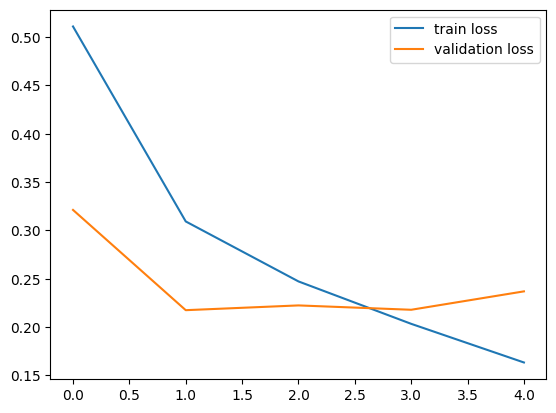

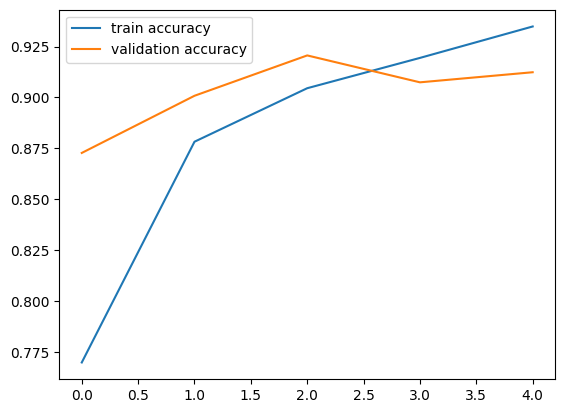

In [58]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/—Pngtree—man wearing mask with surprised_6025925.png


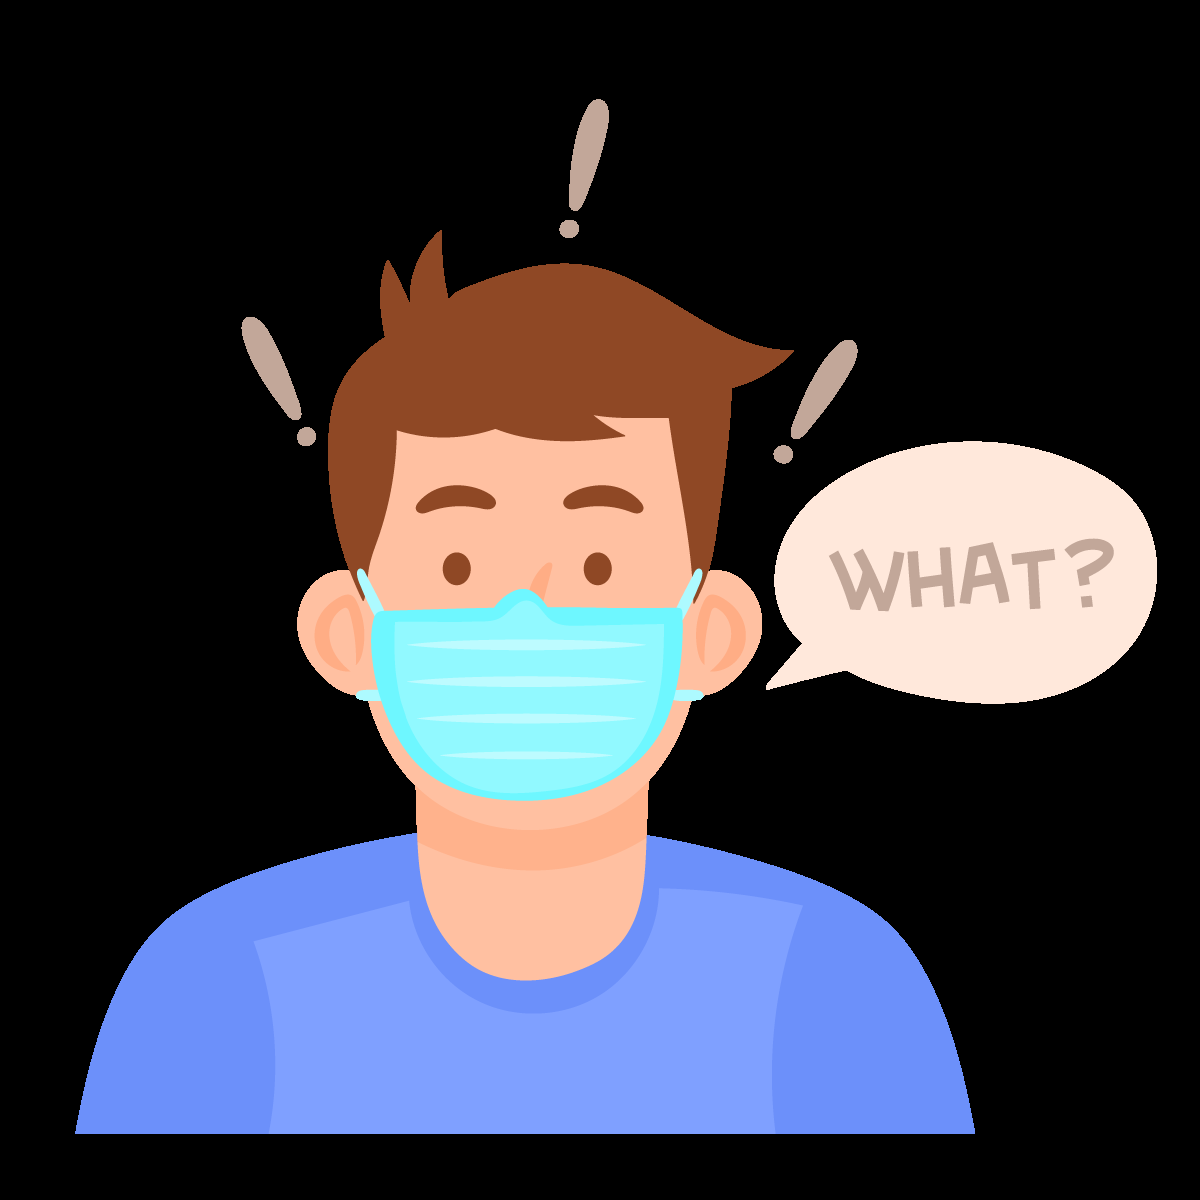

1/1 [==============================] - 0s 22ms/step
[[0.00421237 0.97294056]]
1
The person in the image is wearing a mask


In [60]:
# predictive system
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')